# Week 3

### How Do Bacteria Make Antibiotics?

In [1]:
with open('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_3/RNA_codon_table.txt') as file:
    codonDict = {
        line.split()[0]:line.split()[1] if len(line.split())>1 else '*' for line in file
    }
print(codonDict['AUG'])

with open('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_3/RNA_codon_table.txt') as file:
    aminoacidDict = {}
    for line in file:
        if len(line.split()) == 1:
            codon = line.split()[0]
            aminoAcid = 'Stop'
        else:
            codon = line.split()[0]
            aminoAcid = line.split()[1]
        
        if aminoAcid not in aminoacidDict:
            aminoacidDict[aminoAcid] = []
        aminoacidDict[aminoAcid].append(codon)
print(aminoacidDict['L'])

M
['CUA', 'CUC', 'CUG', 'CUU', 'UUA', 'UUG']


### Collection of Functions
Here we present a Collection of Functions to use while working with RNA and DNA:
- DnaToRna and vice versa
- ReverseComplement of Dna
- TranslateRnaFromStart to translate single ORFrame
- TranslateRnaAllFrames to run TranslateRnaFromStart on all possible ORF (0,1,2)
- SearchPatternInString to search AminoAcid patterns in Peptide
- FindAminoacidPatterns utilites all above to get indices of AA pattern in DNA string and its RC

#### Protein Translation Problem
Translate an RNA string into an amino acid string.

Input: An RNA string Pattern and the array GeneticCode.

Output: The translation of Pattern into an amino acid string Peptide.

#### Peptide Encoding Problem
Find substrings of a genome encoding a given amino acid sequence.

Input: A DNA string Text, an amino acid string Peptide, and the array GeneticCode.

Output: All substrings of Text encoding Peptide (if any such substrings exist).

In [2]:
def DnaToRna(DnaSequence:str):
    '''Func to convert DNA string to RNA'''
    return DnaSequence.replace('T', 'U')
    

def RnaToDna(RnaSequence:str):
    '''Func to convert RNA string to DNA'''
    return RnaSequence.replace('U', 'T')


def ReverseComplement(String:str):
    '''
    Function to return reverse complement of given DNA or RNA strand at 5->3 direction
    '''
    NucleotidesDict = { "A": "T", "T": "A", "G": "C", "C": "G" }
    return ''.join(NucleotidesDict[nucl] for nucl in String)[::-1]


def SearchPatternInString(Sequence:str, Pattern:str):
    '''
    Func to convert Search pattern in string
    '''
    k = len(Pattern) 
    return [ i for i in range(len(Sequence) - k + 1) if Sequence[i:i+k]==Pattern ]


def TranslateRnaFromStart(Sequence:str, noStop=False):
    '''
    Function to translate every codon to aminoacid, without checking other ORF
    '''
    maxReading = len(Sequence) // 3 * 3 
    Peptide = ''.join([ # берем каждый третий нуклеотид до конца строки и через словарь переводим в АМК
        codonDict[Sequence[i:i+3]] for i in range(0, len(Sequence) - 2, 3)
    ])
    if noStop:
        return Peptide.replace('*','')
    return Peptide


def TranslateRnaAllFrames(Sequence:str):
    '''Function to translate all possible RNA frames to peptides '''
    Proteins = { i: TranslateRnaFromStart(Sequence=Sequence[i:])for i in range(3) }
    return Proteins


def FindAminoacidPatterns(DnaSequence:str, AAPattern:str, printOutput=True):
    '''
    Function can find all peptides in chosen DNA string and its RC,
    get indices of desired AA pattern and return DNA regions, encoding desired pattern.
    '''
    PeptidesDict = TranslateRnaAllFrames(Sequence=DnaToRna(DnaSequence)) # словари петидов прямой и RC последовательностей для разных ORF
    PeptidesDictRC = TranslateRnaAllFrames(Sequence=DnaToRna(ReverseComplement(String=DnaSequence)))

    totalDNaIndices = set()
    for i in range(3): # индексы для прямых петидов получаем просто: точка начала ORF + индекс паттерна*3 (3 нуклеотида в одной АМК)
       totalDNaIndices.update([ i + (index * 3)  for index in SearchPatternInString(Sequence=PeptidesDict[i], Pattern=AAPattern) ])
       totalDNaIndices.update([ len(DnaSequence) - i - (index + len(AAPattern)) * 3 # для обратных у нас индекс идет с обратного конца
            for index in SearchPatternInString(Sequence=PeptidesDictRC[i], Pattern=AAPattern) ])
    
    DnaPatterns = [ DnaSequence[position:position+(len(AAPattern)*3)] for position in totalDNaIndices ] 
    # берем учатски из ДНК длинной паттерн*3

    if printOutput:
        print(*DnaPatterns, sep='\n')
    else:
        return DnaPatterns

In [3]:
# TranslateRnaAllORF(Sequence=DnaToRna('ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA'))
y = FindAminoacidPatterns(
    DnaSequence='ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA',
    AAPattern='MA',
    printOutput=True
)

ATGGCC
GGCCAT
ATGGCC


Let's find Tyrocidine B1 (VKLFPWFNQY) in Bacillus brevis genome!

In [4]:
genome = ''.join([ i.strip() for i in input().split() ])

In [5]:
x = FindAminoacidPatterns(DnaSequence=genome, AAPattern='VKLFPWFNQY', printOutput=False)
len(x)

0

After solving the Peptide Encoding Problem for Tyrocidine B1, we should be able to find a 30-mer in the Bacillus brevis genome encoding Tyrocidine B1, and yet no such 30-mer exists!

## From linear to cyclic peptides
Neither Gause nor Synge was aware of it, but **tyrocidines and gramicidins are actually cyclic peptides**. 

Thus, Tyrocidine B1 has ten different linear representations, and **we should run the Peptide Encoding Problem on every one of these sequences** to find potential 30-mers coding for Tyrocidine B1. Yet when we solve the Peptide Encoding Problem for each of the ten strings on the right in the figure below, we find no 30-mer in the Bacillus brevis genome encoding Tyrocidine B1!

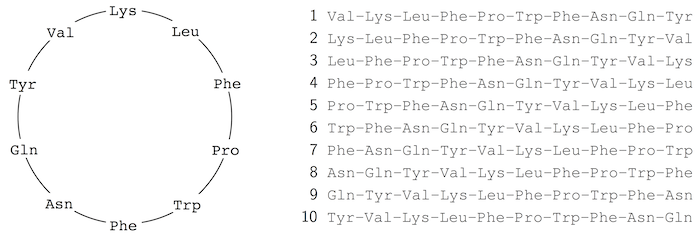

In 1969, Fritz Lipmann demonstrated that tyrocidines and gramicidins are non-ribosomal peptides (NRPs), synthesized not by the ribosome, but by a giant protein called NRP synthetase.

## Introduction to mass spectrometry
The workhorse of peptide sequencing is the mass spectrometer, an expensive molecular scale that shatters molecules into pieces and then weighs the resulting fragments. The mass spectrometer measures the mass of a molecule in daltons (Da); 1 Da is approximately equal to the mass of a single nuclear particle (i.e., a proton or neutron).

We can calculate approximate mass for every Aminoacid
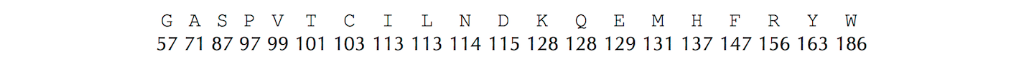

In [6]:
with open('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_3/integer_mass_table.txt') as mass_file:
    mass_dict = {
        line.split()[0]: int(line.split()[-1]) for line in mass_file.readlines()
    }

print(mass_dict)

with open('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_3/integer_mass_table.txt') as mass_file:
    reversed_mass_dict_simplified = { # здесь мы не отличаем аминокислоты с одинаковыми массами
        int(line.split()[-1]): line.split()[0] for line in mass_file.readlines()
    }

print(reversed_mass_dict_simplified)

{'G': 57, 'A': 71, 'S': 87, 'P': 97, 'V': 99, 'T': 101, 'C': 103, 'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 'E': 129, 'M': 131, 'H': 137, 'F': 147, 'R': 156, 'Y': 163, 'W': 186}
{57: 'G', 71: 'A', 87: 'S', 97: 'P', 99: 'V', 101: 'T', 103: 'C', 113: 'L', 114: 'N', 115: 'D', 128: 'Q', 129: 'E', 131: 'M', 137: 'H', 147: 'F', 156: 'R', 163: 'Y', 186: 'W'}


Tyrocidine B1, which is represented by VKLFPWFNQY, has total mass 1322 Da

The mass spectrometer can break each molecule of Tyrocidine B1 into two linear fragments, and it analyzes samples that may contain billions of identical copies of the peptide, with each copy breaking in its own way. One copy may break into LFP and WFNQYVK (with respective masses 357 and 965), whereas another may break into PWFN and QYVKLF. 

Our goal is to use the masses of these and other fragments to sequence the peptide. The collection of all the fragment masses generated by the mass spectrometer is called an **experimental spectrum**.

#### Exercise Break: 
How many subpeptides does a cyclic peptide of length n have?

How many different k-mers exist in a circular string of length "n"? 

Ans: There are "n" k-mers in a circular string of length "n", since each k-mer can start from any of the "n" positions in the string. 

So, there are "n" "1"-mer sub-peptides, "n" "2"-mer sub-peptides, ... "n" "n-1"-mer sub-peptides. 

Therefore, the total number of sub-peptides is n(n-1).

The cyclic peptide NQEL has 12 subpeptides: N, Q, E, L, NQ, QE, EL, LN, NQE, QEL, ELN, and LNQ

### Generating Theoretical Spectrum Problem: 
Generate the theoretical spectrum of a cyclic peptide.

Input: An amino acid string Peptide.

Output: Cyclospectrum(Peptide).

In [7]:
def countMass(Peptide):
    return sum([ mass_dict[aminoacid] for aminoacid in Peptide ])


def SubpeptidesCyclic(Peptide:str):
    cycle = Peptide + Peptide
    return [ cycle[i:i+j] for j in range(1, len(Peptide)) for i in range(len(Peptide)) ] + [ Peptide ]


def MassSpectrum(Peptide:str):
    Peptides = SubpeptidesCyclic(Peptide=Peptide)
    massSpec = [ countMass(fragment) for  fragment in Peptides ]
    massSpec.insert(0, 0)
    return sorted(massSpec)

In [8]:
Peptide = 'LEQN'
SP = SubpeptidesCyclic(Peptide)
SP.insert(0,'-')
MS = MassSpectrum(Peptide)
print(*SP, sep='\t')
print(*MS, sep='\t')


-	L	E	Q	N	LE	EQ	QN	NL	LEQ	EQN	QNL	NLE	LEQN
0	113	114	128	129	227	242	242	257	355	356	370	371	484


Generating the theoretical spectrum of a known peptide is easy, but our aim is to solve the reverse problem of reconstructing an unknown peptide from its experimental spectrum. 

We will start by assuming that a biologist is lucky enough **to generate an ideal spectrum**, which is one coinciding with the peptide’s theoretical spectrum.



## Cyclopeptide Sequencing Problem: 
Given an ideal spectrum, find a cyclic peptide whose theoretical spectrum matches the experimental spectrum.

Input: A collection of (possibly repeated) integers Spectrum corresponding to an ideal spectrum.

Output: An amino acid string Peptide such that Cyclospectrum(Peptide) = Spectrum (if such a string exists).

Let’s design a straightforward brute force algorithm for the Cyclopeptide Sequencing Problem. 
### Brute Force Algorithm
#### Counting Peptides with Given Mass Problem (BFCyclopeptideSequencing):
Compute the number of peptides of given mass.

Input: An integer m.

Output: The number of linear peptides having integer mass m.

In [9]:
def BFCyclopeptideSequencing(Mass, massDict=dict()):
    if Mass == 0: return 1, massDict # если масса дошла суммарно до искомой, пишем что пептид такой массы встретился один раз
    if Mass < 57: return 0, massDict # если масса не сможет никак дойти до нуля, возвращаем 0 - пептид не подошел 
    if Mass in massDict: return massDict[Mass], massDict # если такая масса уже записана в словаре, будем добавлять ее
        
    n = 0
    for i in reversed_mass_dict_simplified: # функция с рекурсией - для каждой массы в списке мы запускаем функцию с обновленной общей массой
        k, massDict = BFCyclopeptideSequencing(Mass-i, massDict) # получаем количество встречаемых значений (см первые строки) и обновленный словарь massDict
        n += k 
        
    massDict[Mass] = n # записываем в словарь новое число встречаемых значений
    return n, massDict

print(BFCyclopeptideSequencing(1322, {})[0])

## решение не мое :(

51972523134741


It turns out that there are trillions of peptides have the same integer mass (1322) as Tyrocidine B1

In [10]:
def SubpeptidesLinear(Peptide:str):
    return sorted([ Peptide[i:i+j] for i in range(len(Peptide)) for j in range(1, len(Peptide)-i+1) ], key=len)

In [11]:
SPLinear = SubpeptidesLinear('NQE')
SPLinear.insert(0, '-')
SPLinear

['-', 'N', 'Q', 'E', 'NQ', 'QE', 'NQE']

In [12]:
## Считаем, сколько будет линейных фрагментов в пептиде: NQEL = 1 нулевой + 1 из 4х букв + 2 из трех букв + 3 из двух + 4 из одной = 11
n = 35581
sum([ (n-k)for k in range(n)]) + 1

633021572

What about the branching step? Given the current collection of linear peptides Peptides, define Expand(Peptides) as a new collection containing all possible extensions of peptides in Peptides by a single amino acid mass. We can now provide the pseudocode for the branch-and-bound algorithm, called CyclopeptideSequencing.

### Branch and Bound Algorithm

In [13]:
MassSpectrum(Peptide='KLM')

[0, 113, 128, 131, 241, 244, 259, 372]

In [14]:
def CheckConsistentPeptideLinear(Peptide, Spectrum):
    '''
    Function to check, if Peptide is Consistent - if all linear subpeptides present in Spectrum
    '''
    return all([countMass(peptide) in Spectrum for peptide in SubpeptidesLinear(Peptide)])


def CheckConsistentPeptideCyclic(Peptide, Spectrum):
    '''
    Function to check, if Peptide is Consistent - if all linear subpeptides present in Spectrum
    '''
    return all([countMass(peptide) in Spectrum for peptide in SubpeptidesCyclic(Peptide)])


def CyclopeptideSequencing(Spectrum:list):
    '''
    Function to check for all possible Peptides, Consistent among Spectrum
    '''
    CandidatePeptides = {''}
    FinalPeptides = set()
    CandidatePeptides = ExpandPeptides(CandidatePeptides, Spectrum) 

    while len(CandidatePeptides) > 0:
        for Peptide in CandidatePeptides:
            if MassSpectrum(Peptide) == Spectrum: # If peptide mass is equal to max mass in spectrum, we count it as a match
                if CheckConsistentPeptideCyclic(Peptide, Spectrum):
                    FinalPeptides.add(TransformPeptideIntoMasses(Peptide))

        CandidatePeptides = ExpandPeptides(CandidatePeptides, Spectrum)

    return FinalPeptides


def ExpandPeptides(Peptides, Spectrum):
    '''
    Function to expand Peptide with 1 aminoacid and keep it if Peptide is Consistent'''
    return [
        str(peptide) + str(aminoacid) for peptide in Peptides for aminoacid in mass_dict
        if CheckConsistentPeptideLinear(Peptide=str(peptide)+str(aminoacid), Spectrum=Spectrum)
    ]


def TransformPeptideIntoMasses(Peptide):
    '''
    Function to present output Peptides as groups of aminoacid masses
    '''
    return '-'.join([ str(mass_dict[aminoacid]) for aminoacid in Peptide ])

In [15]:
Spectrum = [0,113,128,186,241,299,314,427]
print(*CyclopeptideSequencing(Spectrum=Spectrum))

113-128-186 128-186-113 186-113-128 113-186-128 128-113-186 186-128-113


### And now we can use CyclopeptideSequencing to Analyze spectrum for Tyrocidine B1 !

In [32]:
x = CyclopeptideSequencing([int(i) for i in input().split()])
y = [ ''.join([
    reversed_mass_dict_simplified[int(i)] for i in j.split('-')
]) for j in x]
print(*sorted(y))

FLQVYQNFWP FNQYVQLFPW FPWFNQYVQL FWPFLQVYQN LFPWFNQYVQ LQVYQNFWPF NFWPFLQVYQ NQYVQLFPWF PFLQVYQNFW PWFNQYVQLF QLFPWFNQYV QNFWPFLQVY QVYQNFWPFL QYVQLFPWFN VQLFPWFNQY VYQNFWPFLQ WFNQYVQLFP WPFLQVYQNF YQNFWPFLQV YVQLFPWFNQ


Done! For now ..